In [1]:
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [3]:
pubmed_vec_file = '../PubMed-w2v.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(pubmed_vec_file, binary=True)

In [40]:


# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['p53']) 

# We will also need to get the words closest to a word
p53 = model.similar_by_word('p53')
# apaf1 = model.similar_by_word('apaf1')

# both = np.concatenate((p53, apaf1), axis=0)
type(p53)

[ 0.12095331 -0.01903811 -0.23253776 -0.0294948  -0.65409213  0.24585606
 -0.22683206 -0.37311748  0.26606172  0.02262371  0.29971805  0.12196983
 -0.20228791  0.44956326  0.09927637 -0.20024565  0.04686838 -0.07133814
 -0.04036802  0.01558138 -0.10264102  0.12906736  0.09394649 -0.04082048
 -0.13106003  0.01583649  0.19666436  0.09064209 -0.23514822  0.34799248
 -0.08191503 -0.18414648  0.32320938  0.24278814  0.01425285 -0.19916484
 -0.19607055  0.3046065  -0.07466655 -0.42778823  0.04788399 -0.12691455
  0.01203044 -0.27324617 -0.2292499   0.1563072  -0.46577474 -0.17767571
 -0.26830518  0.44981125 -0.25118446  0.19252335  0.24536143  0.3582944
  0.08427444  0.24619521  0.08294627 -0.08331659  0.10000534 -0.12106978
  0.5258323   0.07515515  0.37895313 -0.05272834  0.07129586  0.01697357
 -0.40063795 -0.24631558 -0.18321821  0.26843217  0.06435432 -0.13805076
  0.39253575 -0.03426902 -0.07100315  0.1904917  -0.17580834 -0.30180115
 -0.2766878   0.15219104 -0.05120631 -0.18572314 -0.

/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


list

In [24]:
len(model['p53'])

200

In [95]:
# Takes a Word2Vec model and a list of numbers and plots a tSNE scatterplot
def display_closestwords_tsnescatterplot(model, words):
    
    
    arr = np.empty((0,200), dtype='f')

    word_labels = []
    close_words = []
    
    for word in words:
        word_labels.extend([word])
        close_words.extend(model.similar_by_word(word))
        arr = np.append(arr, np.array([model[word]]), axis=0)
    
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
    
    # Find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # Scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()-50, x_coords.max()+50)
    plt.ylim(y_coords.min()-50, y_coords.max()+50)
    plt.show()



/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


<IPython.core.display.Javascript object>


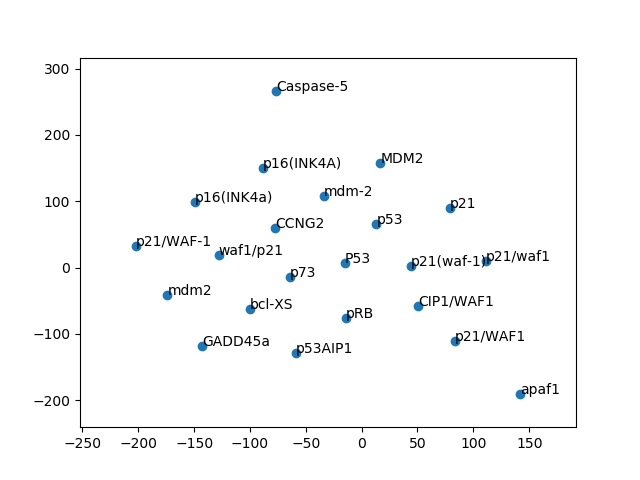

In [96]:
display_closestwords_tsnescatterplot(model, ['p53', 'apaf1'])

In [86]:
arr = np.empty((0,200), dtype='f')


In [85]:
arr.app

array([], shape=(0, 200), dtype=float32)